In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gradio as gr

In [2]:
crop_data = pd.read_csv('dataset/Crop_recommendation.csv')

In [3]:
crop_data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
crop_data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [5]:
crop_data.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [6]:
crop_data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
crop_data.describe(include = 'all')

,N,P,K,temperature,humidity,ph,rainfall,label
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rice
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,NaN
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,NaN
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,NaN
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,NaN
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,NaN
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,NaN


In [8]:
crop_data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [9]:
crop_data['label'].nunique()

22

In [10]:
crop_data['label'] = crop_data['label'].map({'rice':1, 'maize':2, 'chickpea':3, 'kidneybeans':4,
       'pigeonpeas':5 , 'mothbeans':6 , 'mungbean':7 , 'blackgram':8 , 'lentil':9 ,'pomegranate':10 , 
       'banana':11 ,'mango':12 ,'grapes':13,'watermelon':14,'muskmelon':15 ,'apple':16 ,'orange':17 , 
       'papaya':18 , 'cococnut':19 ,'cotton':20 , 'jute':21 , 'coffee':22})

In [11]:
crop_data['label'].isnull().any()

True

In [12]:
crop_data.fillna(0 , inplace = True)

In [13]:
y=  crop_data['label']
X=  crop_data.drop('label',axis=1)

In [14]:
X.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


In [15]:
from sklearn.model_selection import train_test_split,GridSearchCV# splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [16]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=20,max_depth=5,bootstrap=False,random_state=0)
clf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=False, max_depth=5, n_estimators=20,
                       random_state=0)

In [17]:
import seaborn as sns

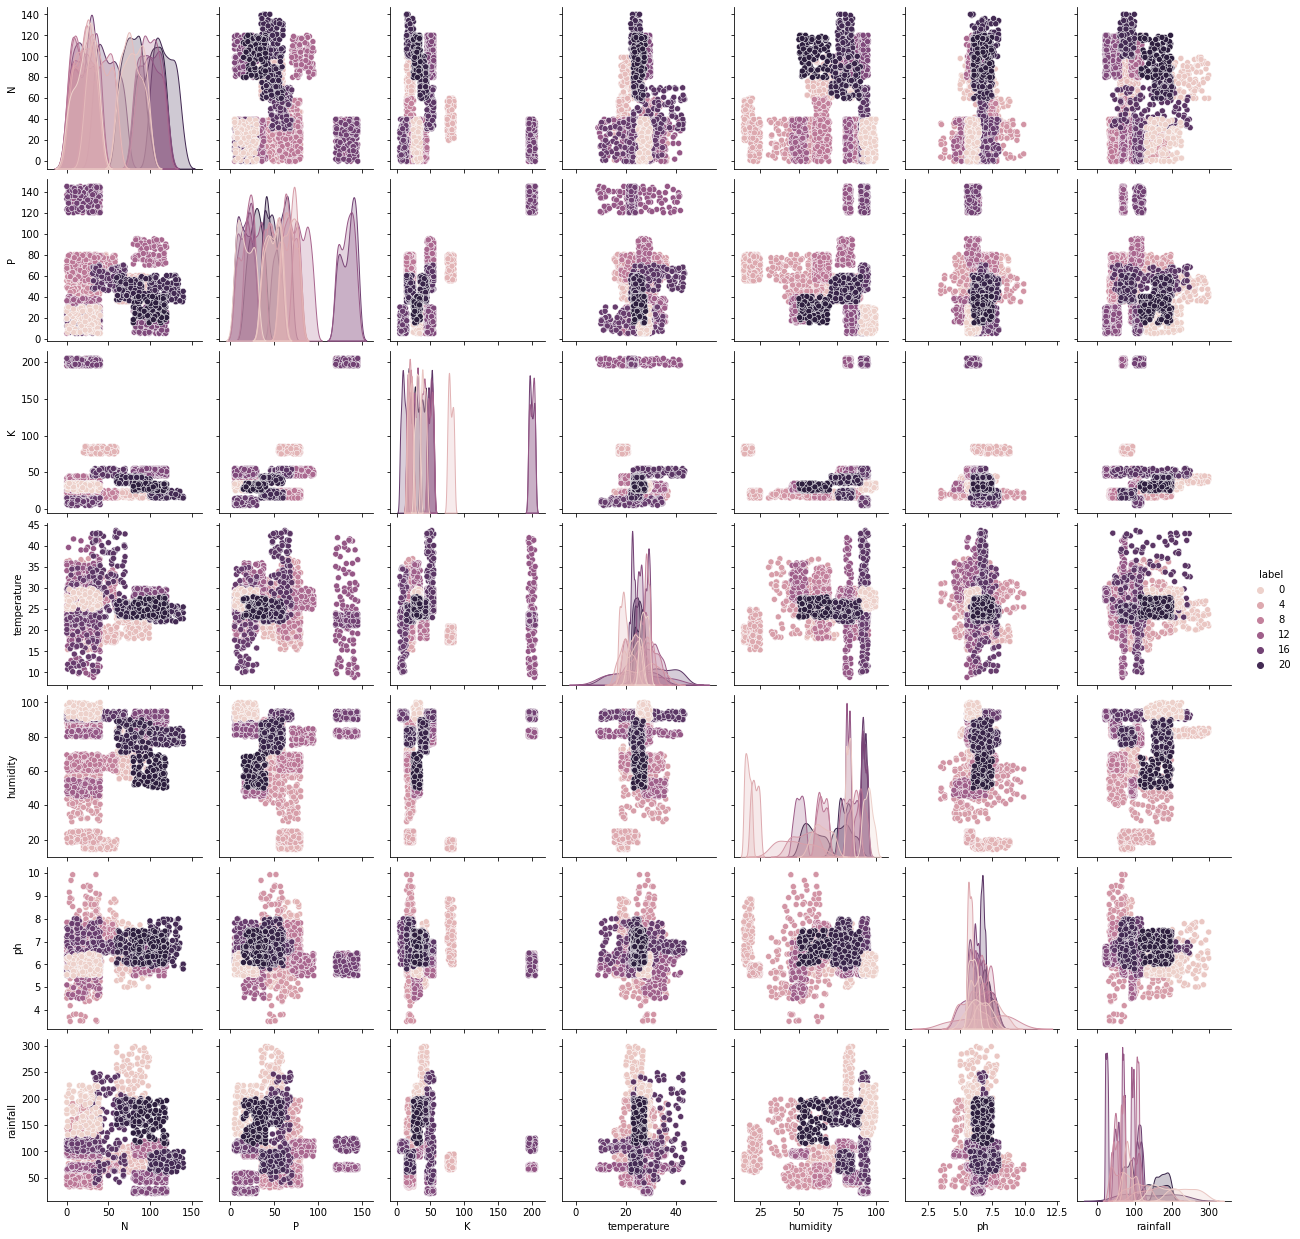

In [18]:
sns.pairplot( crop_data,hue='label')

In [19]:
y_pred=clf.predict(X_test)


In [20]:
from sklearn import metrics

# Model Accuracy
print("Accuracy:", metrics.accuracy_score(y_pred, y_test))

Accuracy: 0.943939393939394


In [21]:
y_pred

array([14., 14., 13.,  3.,  8.,  1.,  6.,  4., 15., 11.,  6., 22.,  9.,
        7., 12., 16., 22.,  9., 22., 12.,  0.,  8.,  4.,  1., 20., 22.,
        9., 17.,  6.,  4., 10.,  1.,  2., 15.,  0., 20., 12., 12., 14.,
        8.,  2.,  8.,  5., 14.,  5.,  7.,  4.,  4., 20.,  7.,  6.,  8.,
       16., 15.,  5., 11., 18., 12.,  9., 20., 17.,  7., 14., 21., 15.,
       16., 13., 22., 16., 17.,  0., 10.,  4.,  2., 13.,  6.,  3.,  2.,
       21., 12.,  1.,  8., 14., 14., 15., 20.,  2.,  9.,  6., 18.,  8.,
       21.,  7., 13.,  7.,  2., 22.,  1.,  9.,  3., 17.,  1.,  7., 11.,
       11.,  1., 14., 22.,  5., 15., 15., 12., 22., 13., 17., 10.,  7.,
        9.,  2., 21., 10.,  9., 17.,  3.,  3.,  8., 10., 17.,  3., 18.,
        6.,  6., 15.,  7.,  2.,  7.,  0., 10., 17.,  8.,  8., 13., 16.,
       22.,  3., 16., 21., 12., 14., 18., 17.,  0.,  6., 11., 10.,  3.,
       14.,  8., 16., 21.,  9.,  5., 21.,  4.,  4., 15.,  1., 15., 11.,
       17.,  5., 16.,  6.,  0., 20.,  7.,  4., 10., 18., 17.,  1

In [22]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(clf,X,y,cv=10).mean())

0.9568181818181818


In [23]:
import gradio as gr

In [24]:
def predict_crop_RFC(n, p, k, temperature, humidity, ph, rainfall):
        crop_names = {0:'rice' , 1: 'maize' , 2: 'chickpea' , 3: 'kidneybeans' , 4: 'pigeonpeas',
                      5: 'mothbeans' , 6: 'mungbean' , 7:'blackgram' , 8: 'lentil' , 9: 'pomegranate',
                      10: 'banana' , 11: 'mango' , 12: 'grapes' , 13: 'watermelon' , 14: 'muskmelon' , 
                      15: 'apple' , 16: 'orange' , 17: 'papaya' , 18: 'coconut' , 19:  'cotton' , 20 : 'jute',
                      21 : 'coffee' }
                    #   crop_names = {0: 'rice', 1: 'wheat', 2: 'cotton'}
        crop_features = [[n, p, k, temperature, humidity, ph, rainfall]]
        prediction = clf.predict(crop_features)[0]
        return crop_names[prediction]

# Define the Gradio interface
inputs = [
          gr.inputs.Number(label="Nitrogen"),
          gr.inputs.Number(label="Phosphorous"),
          gr.inputs.Number(label="Potassium"),
          gr.inputs.Number(label="Temperature"),
          gr.inputs.Number(label="Humidity"),
          gr.inputs.Number(label="PH"),
          gr.inputs.Number(label="Rainfall")
]

outputs = gr.outputs.Textbox(label="Predicted Crop")
interface = gr.Interface(fn=predict_crop_RFC, inputs=inputs, outputs=outputs, 
                         title="Crop Prediction", description="Predict the crop based on the given inputs.")

# Launch the interface
interface.launch()


c:\Users\Shree123\anaconda3\lib\site-packages\gradio\inputs.py:59: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
c:\Users\Shree123\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
c:\Users\Shree123\anaconda3\lib\site-packages\gradio\outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.
